[INFO] Loaded 27 descriptor(s) from ./mapping_schemes
Selected mapping: adinstruments_mapping_378
Score: 3
[[ 5.34375 -0.46875  0.25    ...  3.40625  3.6875   5.     ]]


C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_21196\3029643505.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\MaxHaberbusch\anaconda3\envs\xlstm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


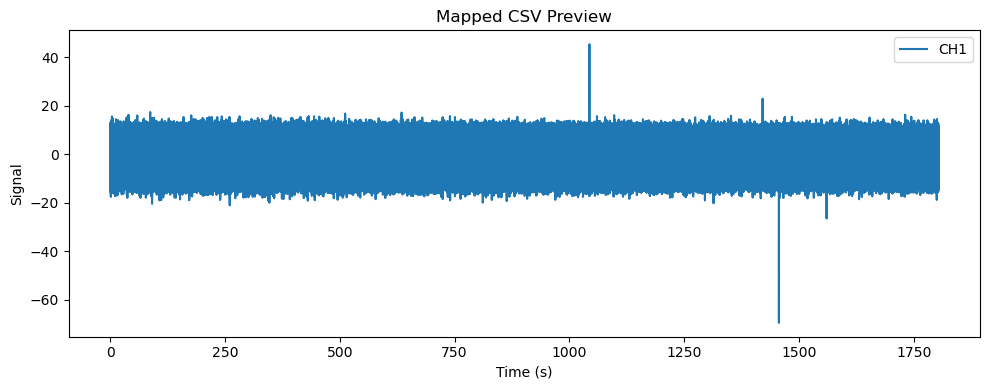

✅ Saved standardized data to: output\ML032922B-M-040422B-NeuroAmp.adicht


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

import matplotlib.pyplot as plt
from pathlib import Path
from sparcfuse.utils import match_best_mapping, load_all_descriptors, save_standardized_output

# Load all descriptor files from folder
descriptors = load_all_descriptors()

# File to convert
filepath = "../downloads/ML032922B-M-040422B-NeuroAmp.adicht"
#filepath = "../downloads/emg_freq10_pulseno10_amp1.0_trial1.mat"
filename = Path(filepath).name

# Optional: specify SPARC ID for faster mapping
# Works also without sparc_id as the other csv mapping schemes works well on this CSV file
result = match_best_mapping(descriptors, filepath, sparc_id=400)

# Check if mapping was successful
if result["descriptor"] is None:
    raise RuntimeError("No suitable mapping descriptor found.")

# Show mapping result
print("Selected mapping:", result['descriptor']['id'])
print("Score:", result['score'])


# Preview signal
time = result['result']['time']
signals = result['result']['signals']

print(signals)

plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=f"CH{i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Mapped CSV Preview")
plt.legend()
plt.tight_layout()
plt.show()

# Save to standardized .npz format in ./output
output_dir = Path("../output")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / filename.replace(".csv", ".npz")

save_standardized_output(
    output_path=output_path,
    result_dict=result["result"],
    descriptor=result["descriptor"],
    original_filename=filename,
    annotations=result["result"].get("annotations", []),
    metadata_overrides=None,
    file_format="npz"
)

print(f"✅ Saved standardized data to: {output_path}")


C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_21196\3719787370.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


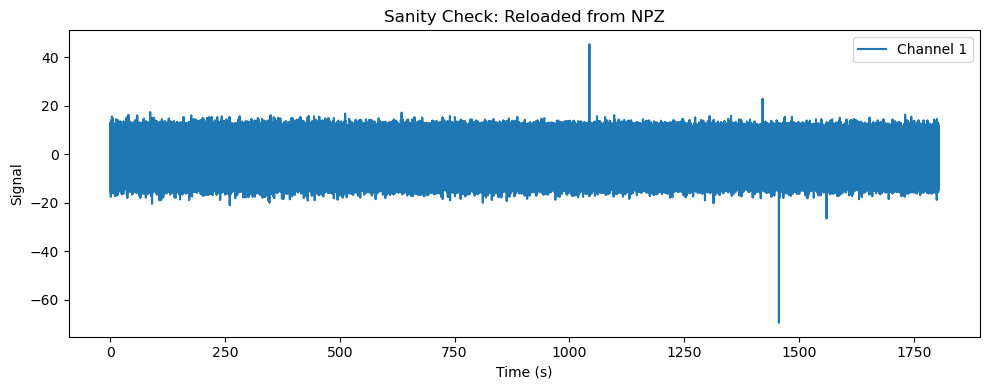

{'time_units': 'seconds', 'time_auto_generated': False, 'source_format': ('.adicht', '.adidat', '.adidatx'), 'database_id': 'unknown', 'sampling_frequency': 20000.0, 'channel_names': ['Channel 1'], 'channel_units': ['unknown'], 'version': 'v1.0', 'upload_date': '2025-07-30', 'conversion_date': '2025-07-30', 'auto_mapped': True, 'doi': 'unknown', 'original_file_name': 'ML032922B-M-040422B-NeuroAmp.adicht', 'sparc_subject_id': 'unknown', 'species': 'unknown', 'anatomical_location': 'unknown', 'modality': 'adinstruments', 'experimenter': ['unknown'], 'institution': 'unknown', 'sweep_mode': False, 'notes': 'Mapped using SPARCFUSE'}
shape of time: (36072000,)
shape of signals: (1, 36072000)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the .npz file
npz_path = Path("../output/ML032922B-M-040422B-NeuroAmp.npz")
data = np.load(npz_path, allow_pickle=True)

# Extract arrays
time = data["time"]
signals = data["signals"]
metadata = data["metadata"].item()  # metadata is saved as a Python dict
channel_names = metadata.get("channel_names", [f"CH{i+1}" for i in range(len(signals))])

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=channel_names[i])
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sanity Check: Reloaded from NPZ")
plt.legend()
plt.tight_layout()
plt.show()

print(data['metadata'])

print("shape of time:", time.shape)
print("shape of signals:", signals.shape)

In [3]:
import adi, pprint
rec = adi.read_file("../downloads/ML032922B-M-040422B-NeuroAmp.adicht")

# 1) What overall file‐level attrs exist?
print("rec attrs:", [k for k in dir(rec) if not k.startswith("_")])

# 2) Sometimes there's a header dict or method
if hasattr(rec, "info"):
    pprint.pprint(rec.info())           # or rec.getInfo(), depending on SDK version

# 3) Per‐channel detailed info
for ch in rec.channels:
    print(f"Channel {ch.id}:")
    print("  name:",       ch.name)
    print("  units:",      getattr(ch, "units", None))
    print("  fs:",         getattr(ch, "fs", None))
    print("  n_records:",  getattr(ch, "n_records", None))
    # any other attrs
    print("  other attrs:", {k: getattr(ch, k) for k in ("gain","offset","type") if hasattr(ch,k)})
    print()


rec attrs: ['channels', 'file_loaded', 'h', 'n_channels', 'n_records', 'records']
Channel 1:
  name: Channel 1
  units: ['µV']
  fs: [20000.0]
  n_records: 1
  other attrs: {}

